In [2]:
'''
@Author: Rashmi
@Date: 2021-12-2 16:10
@Last Modified by: Rashmi
@Last Modified time: 2021-12-3  03:03
@Title : Program to insert a cpu log data.csv file from hdfs into 
hive database using pyhive library,and perform different query and 
also do visualization of the result.
Columns to consider user_name,boot_time,keyboard,mouse

 Finding users with highest number of average hours
 Finding users with lowest number of average hours
 Finding users with highest numbers of idle hours

'''
from pyhive import hive
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
load_dotenv(".env")


True

In [3]:
host_name = os.getenv("Host_name")
port=os.getenv("Port")
user=os.getenv("User_name")
password=os.getenv("Password")

In [4]:
try:
        connection = hive.Connection(host=host_name, port=port, username=user,password=password,auth='CUSTOM')
        cur = connection.cursor()
        cur.execute("CREATE DATABASE HiveCpuDataLog")
        print("Database created successfully")
except Exception as e:
    print(e)

TExecuteStatementResp(status=TStatus(statusCode=3, infoMessages=['*org.apache.hive.service.cli.HiveSQLException:Error while processing statement: FAILED: Execution Error, return code 1 from org.apache.hadoop.hive.ql.exec.DDLTask. Database HiveCpuDataLog already exists:17:16', 'org.apache.hive.service.cli.operation.Operation:toSQLException:Operation.java:335', 'org.apache.hive.service.cli.operation.SQLOperation:runQuery:SQLOperation.java:226', 'org.apache.hive.service.cli.operation.SQLOperation:runInternal:SQLOperation.java:263', 'org.apache.hive.service.cli.operation.Operation:run:Operation.java:247', 'org.apache.hive.service.cli.session.HiveSessionImpl:executeStatementInternal:HiveSessionImpl.java:541', 'org.apache.hive.service.cli.session.HiveSessionImpl:executeStatement:HiveSessionImpl.java:516', 'org.apache.hive.service.cli.CLIService:executeStatement:CLIService.java:282', 'org.apache.hive.service.cli.thrift.ThriftCLIService:ExecuteStatement:ThriftCLIService.java:563', 'org.apache.

In [5]:
try:
        connection = hive.Connection(host=host_name,port=port,username=user,password=password,database="HiveCpuDataLog",auth='CUSTOM')

        cur = connection.cursor()
        cur.execute("create table Cpudata(DateTime date,c1 string,c2 string,c3 string,c4 string,c5 string,c6 string,c7 string,c8 string,c9 string,c10 string,c11 string,c12 string,c13 string,c14 string,c15 string,c16 string,c17 string,c18 string,c19 string,c20 string,c21 string,c22 string,c23 string,c24 string,c25 string,c26 string,c27 string,c28 string,c29 string,c30 string,c31 string,c32 string,c33 string,c34 string,c35 string,c36 string,c37 string,c38 string,c39 string,user_name string,keyboard string,mouse string,c44 string,c45 string) row format delimited fields terminated by ',' stored as textfile location 'hdfs://localhost:9000/sparkallcsv/' tblproperties('skip.header.line.count'='1')")
        print("Table created successfully")

except Exception as e:
    print(e)

TExecuteStatementResp(status=TStatus(statusCode=3, infoMessages=['*org.apache.hive.service.cli.HiveSQLException:Error while processing statement: FAILED: Execution Error, return code 1 from org.apache.hadoop.hive.ql.exec.DDLTask. AlreadyExistsException(message:Table hive.HiveCpuDataLog.Cpudata already exists):17:16', 'org.apache.hive.service.cli.operation.Operation:toSQLException:Operation.java:335', 'org.apache.hive.service.cli.operation.SQLOperation:runQuery:SQLOperation.java:226', 'org.apache.hive.service.cli.operation.SQLOperation:runInternal:SQLOperation.java:263', 'org.apache.hive.service.cli.operation.Operation:run:Operation.java:247', 'org.apache.hive.service.cli.session.HiveSessionImpl:executeStatementInternal:HiveSessionImpl.java:541', 'org.apache.hive.service.cli.session.HiveSessionImpl:executeStatement:HiveSessionImpl.java:516', 'org.apache.hive.service.cli.CLIService:executeStatement:CLIService.java:282', 'org.apache.hive.service.cli.thrift.ThriftCLIService:ExecuteStatemen

To get the user counts

In [6]:
try:
    conn = hive.Connection(host=host_name,port=port,database="HiveCpuDataLog")
    user_working_count = pd.read_sql("select user_name ,count('') as total from Cpudata where keyboard !=0 or mouse!=0 group by user_name",conn)
    print(user_working_count)
except Exception as e:
    print(e)

                      user_name  total
0  bhagyashrichalke21@gmail.com    361
1         damodharn21@gmail.com    191
2       deepshukla292@gmail.com    475
3            iamnzm@outlook.com    459
4     markfernandes66@gmail.com    389
5         rahilstar11@gmail.com    399
6      salinabodale73@gmail.com    440
7         sharlawar77@gmail.com    457


Plotting bar graph 

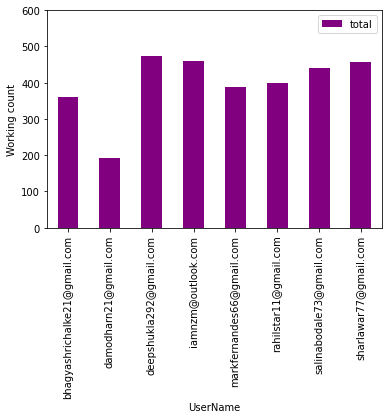

In [7]:
try:
    user_working_count.plot.bar(x='user_name', y='total',color = 'purple')
    plt.ylim(0,600)
    plt.xlabel("UserName")
    plt.ylabel("Working count")
    plt.show()
except Exception as e:
    print(e)

Getting average working seconds of each user

In [8]:
avg_work_sec=pd.read_sql("select user_name,((((count(''))*5)*60)/6) as average_working_sec from cpudata where keyboard!=0 or mouse!=0 group by user_name",conn)
print(avg_work_sec)


                      user_name  average_working_sec
0  bhagyashrichalke21@gmail.com              18050.0
1         damodharn21@gmail.com               9550.0
2       deepshukla292@gmail.com              23750.0
3            iamnzm@outlook.com              22950.0
4     markfernandes66@gmail.com              19450.0
5         rahilstar11@gmail.com              19950.0
6      salinabodale73@gmail.com              22000.0
7         sharlawar77@gmail.com              22850.0


Coverting average work seconds to average hour and getting highest,lowest average working hour.

In [9]:
average_work_hour = avg_work_sec[["user_name","average_working_sec"]]
average_work_hour["average_working_sec"]= pd.to_datetime(average_work_hour['average_working_sec'] ,unit='s').dt.strftime("%H:%M")
average_work_hour.rename(columns={'average_working_sec': 'average_working_hour'}, inplace=True)
print(average_work_hour,"\n")

print("Highest average working hour")
highest_average_work_hour=average_work_hour.max()
print(highest_average_work_hour,"\n")

print("Lowest average working hour")
lowest_average_work_hour=average_work_hour.min()
print(lowest_average_work_hour)

                      user_name average_working_hour
0  bhagyashrichalke21@gmail.com                05:00
1         damodharn21@gmail.com                02:39
2       deepshukla292@gmail.com                06:35
3            iamnzm@outlook.com                06:22
4     markfernandes66@gmail.com                05:24
5         rahilstar11@gmail.com                05:32
6      salinabodale73@gmail.com                06:06
7         sharlawar77@gmail.com                06:20 

Highest average working hour
user_name               sharlawar77@gmail.com
average_working_hour                    06:35
dtype: object 

Lowest average working hour
user_name               bhagyashrichalke21@gmail.com
average_working_hour                           02:39
dtype: object


Barplot using seaborn:

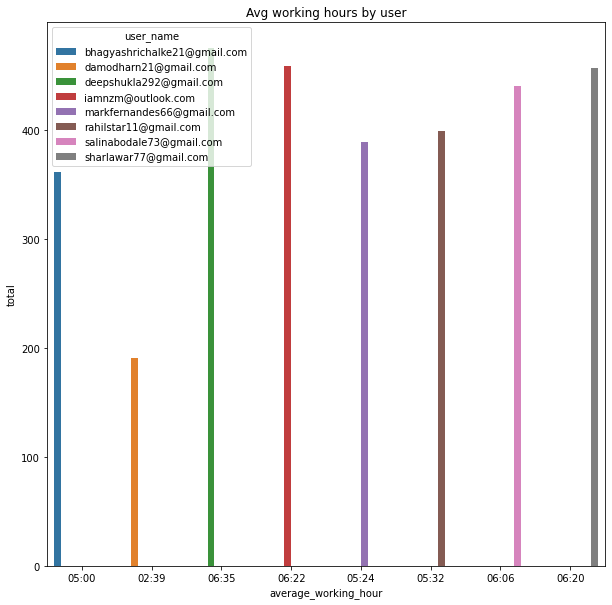

In [10]:
total = user_working_count['total']
plt.figure(figsize = (10,10))
sns.barplot(x = 'average_working_hour',y=total,data = average_work_hour,hue='user_name')
plt.title("Avg working hours by user")
plt.show()

Getting counts of users who are  idle.

In [15]:
try:
    conn = hive.Connection(host=host_name,port=port,database='HiveCpuDataLog')
    user_idle_count = pd.read_sql("select user_name ,count('') as total from cpudata where keyboard=0 and mouse=0 group by user_name",conn)
    print(user_idle_count)
except Exception as e:
    print(e)


                      user_name  total
0  bhagyashrichalke21@gmail.com    121
1         damodharn21@gmail.com     62
2       deepshukla292@gmail.com     90
3            iamnzm@outlook.com    155
4     markfernandes66@gmail.com    119
5         rahilstar11@gmail.com    152
6      salinabodale73@gmail.com    129
7         sharlawar77@gmail.com    123



Getting average idle seconds of all users.

In [16]:
avg_idle_sec=pd.read_sql("select user_name,((((count(''))*5)*60)/6) as average_idle_sec from cpudata where keyboard==0 and mouse==0 group by user_name",conn)
print(avg_idle_sec)


                      user_name  average_idle_sec
0  bhagyashrichalke21@gmail.com            6050.0
1         damodharn21@gmail.com            3100.0
2       deepshukla292@gmail.com            4500.0
3            iamnzm@outlook.com            7750.0
4     markfernandes66@gmail.com            5950.0
5         rahilstar11@gmail.com            7600.0
6      salinabodale73@gmail.com            6450.0
7         sharlawar77@gmail.com            6150.0


Converting average idle seconds to average idle hours and finding the highest,lowest avg idle hrs.

In [18]:
average_idle_hour = avg_idle_sec[["user_name","average_idle_sec"]]
average_idle_hour["average_idle_sec"]= pd.to_datetime(average_idle_hour['average_idle_sec'] ,unit='s').dt.strftime("%H:%M")
average_idle_hour.rename(columns={'average_idle_sec': 'average_idle_hour'}, inplace=True)
print(average_idle_hour,"\n")

print("Highest average idle hour")
highest_average_idle_hour=average_idle_hour.max()
print(highest_average_idle_hour,"\n")

print("Lowest average idle hour")
lowest_average_idle_hour=average_idle_hour.min()
print(lowest_average_idle_hour)

                      user_name average_idle_hour
0  bhagyashrichalke21@gmail.com             01:40
1         damodharn21@gmail.com             00:51
2       deepshukla292@gmail.com             01:15
3            iamnzm@outlook.com             02:09
4     markfernandes66@gmail.com             01:39
5         rahilstar11@gmail.com             02:06
6      salinabodale73@gmail.com             01:47
7         sharlawar77@gmail.com             01:42 

Highest average idle hour
user_name            sharlawar77@gmail.com
average_idle_hour                    02:09
dtype: object 

Lowest average idle hour
user_name            bhagyashrichalke21@gmail.com
average_idle_hour                           00:51
dtype: object


Bar plot using seaborn :

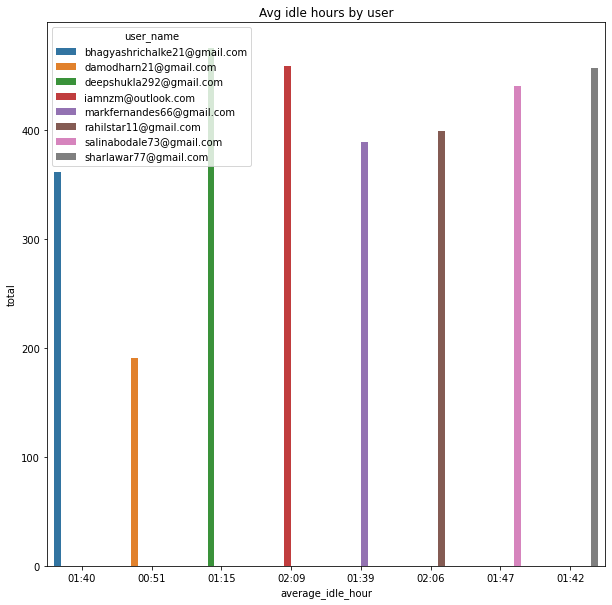

In [19]:
total = user_working_count['total']
plt.figure(figsize = (10,10))
sns.barplot(x = 'average_idle_hour',y=total,data = average_idle_hour,hue='user_name')
plt.title("Avg idle hours by user")
plt.show()